In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

In [54]:
dir='/content/drive/MyDrive/potato-dataset'

In [55]:
batch_size = 32
img_size = 224

In [56]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dir,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size)

Found 2157 files belonging to 3 classes.
Using 1618 files for training.


In [57]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dir,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size)

Found 2157 files belonging to 3 classes.
Using 539 files for validation.


In [58]:
class_names = train_ds.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


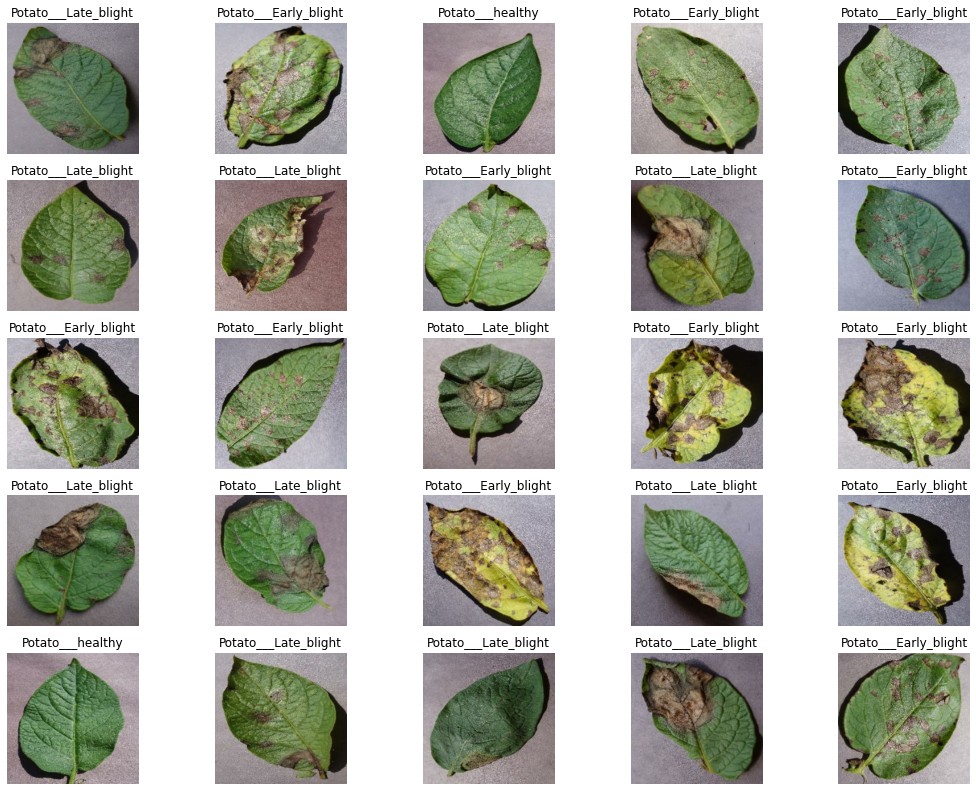

In [59]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 14))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Model-Building

In [61]:
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(
    include_top = False,
    input_shape = (224,224,3),
    classes = 3,
    weights = 'imagenet')
for layer in pretrained_model.layers:
  layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(units = 3,activation = 'softmax'))

In [62]:
resnet_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_9 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 301059    
Total params: 23,888,771
Trainable params: 301,059
Non-trainable params: 23,587,712
_________________________________________________________________


In [63]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [65]:
history = resnet_model.fit(train_ds,validation_data=val_ds,epochs=5)

Epoch 1/5
51/51 [==============================] - 20s 317ms/step - loss: 2.4587 - accuracy: 0.8801 - val_loss: 0.6999 - val_accuracy: 0.9369
Epoch 2/5
51/51 [==============================] - 16s 297ms/step - loss: 0.1980 - accuracy: 0.9845 - val_loss: 0.4255 - val_accuracy: 0.9573
Epoch 3/5
51/51 [==============================] - 16s 298ms/step - loss: 0.0697 - accuracy: 0.9895 - val_loss: 0.4132 - val_accuracy: 0.9592
Epoch 4/5
51/51 [==============================] - 16s 297ms/step - loss: 0.0191 - accuracy: 0.9963 - val_loss: 0.3698 - val_accuracy: 0.9647
Epoch 5/5
51/51 [==============================] - 16s 301ms/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 0.3115 - val_accuracy: 0.9740


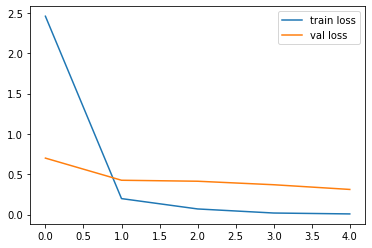

<Figure size 432x288 with 0 Axes>

In [66]:
 # loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

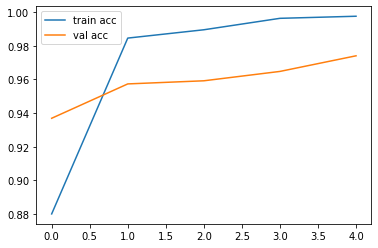

<Figure size 432x288 with 0 Axes>

In [67]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [68]:
from tensorflow.keras.preprocessing import image
def classify(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)
    result = resnet_model.predict(img_array)

    label = class_names[np.argmax(result)]
    return label

In [70]:
prediction = classify('/content/drive/MyDrive/potato-dataset/Potato___Late_blight/0051e5e8-d1c4-4a84-bf3a-a426cdad6285___RS_LB 4640.JPG')
print(prediction)

Potato___Late_blight


In [77]:
resnet_model.save('potata_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
